# PART 2: EXPLORATORY DATA ANALYSIS

In [1]:
# Tasks to be performed:
## Step 1: Import libraries
## Step 2: Import the database
## Step 3: Calculate the parameters of Lipink's rule of five
## Step 4: Normalize IC50 values
## Step 5: Carry out the exploratory analysis itself
## Step 6: Draw insights from the results of the exploratory analysis

# Step 1: Import libraries

In [2]:
!pip install rdkit
import rdkit
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 32.4 MB/s eta 0:00:00


# Step 2: Import the database

In [3]:
# Step 2: Import dataset

from google.colab import files
uploaded = files.upload()

Saving Lepra Clofazimina_PART02 F.csv to Lepra Clofazimina_PART02 F.csv


In [4]:
df = pd.read_csv("Lepra Clofazimina_PART02 F.csv")
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL320553,Cc1oc(-c2ccccc2)nc1CCOc1ccc(C[C@](C)(Oc2ccccc2...,Active,14.0
1,CHEMBL149676,Cc1oc(-c2ccccc2)nc1CCOc1ccc(CC(C)(Oc2ccccc2)C(...,Intermediate,18.0
2,CHEMBL344282,Cc1oc(-c2ccccc2)nc1CCOc1ccc(CC(Oc2ccccc2)C(=O)...,Intermediate,128.0
3,CHEMBL278590,Cc1oc(C2CCCCC2)nc1CCOc1ccc(C[C@](C)(Oc2ccccc2)...,Active,15.0
4,CHEMBL424133,Cc1oc(-c2cccs2)nc1CCOc1ccc(C[C@](C)(Oc2ccccc2)...,Intermediate,10.0
...,...,...,...,...
1892,CHEMBL278501,COc1ccccc1CCC1(O)C(C)=C[C@@H](OC(C)=O)[C@@]2(C...,Inactive,142.0
1893,CHEMBL265334,CCOc1ccccc1CCC1(O)C(C)=C[C@@H](OC(C)=O)[C@@]2(...,Inactive,34.0
1894,CHEMBL16428,CCOc1ccccc1CCC1(O)C(C)=C[C@@H](OC(C)=O)[C@@]2(...,Inactive,80.0
1895,CHEMBL360583,COc1cccc(CCC2(O)C(C)=C[C@@H](OC(C)=O)[C@@]3(C)...,Intermediate,24.0


# Step 3: Calculate the parameters of Lipink's rule of five

In [5]:
## 3.1.  Importing libraries.

import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [6]:
## 3.2. Obtaining Lipinski descriptors.
# Inspired by : https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descritores = pd.DataFrame(data=baseData,columns=columnNames)

    return descritores

In [7]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,457.526,5.73632,1.0,5.0
1,457.526,5.73632,1.0,5.0
2,443.499,5.34622,1.0,5.0
3,463.574,6.11702,1.0,5.0
4,463.555,5.79782,1.0,6.0
...,...,...,...,...
1892,710.861,5.30690,1.0,11.0
1893,724.888,5.69700,1.0,11.0
1894,724.888,5.69700,1.0,11.0
1895,710.861,5.30690,1.0,11.0


In [8]:
# Reading the initial dataframe
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL320553,Cc1oc(-c2ccccc2)nc1CCOc1ccc(C[C@](C)(Oc2ccccc2...,Active,14.0
1,CHEMBL149676,Cc1oc(-c2ccccc2)nc1CCOc1ccc(CC(C)(Oc2ccccc2)C(...,Intermediate,18.0
2,CHEMBL344282,Cc1oc(-c2ccccc2)nc1CCOc1ccc(CC(Oc2ccccc2)C(=O)...,Intermediate,128.0
3,CHEMBL278590,Cc1oc(C2CCCCC2)nc1CCOc1ccc(C[C@](C)(Oc2ccccc2)...,Active,15.0
4,CHEMBL424133,Cc1oc(-c2cccs2)nc1CCOc1ccc(C[C@](C)(Oc2ccccc2)...,Intermediate,10.0
...,...,...,...,...
1892,CHEMBL278501,COc1ccccc1CCC1(O)C(C)=C[C@@H](OC(C)=O)[C@@]2(C...,Inactive,142.0
1893,CHEMBL265334,CCOc1ccccc1CCC1(O)C(C)=C[C@@H](OC(C)=O)[C@@]2(...,Inactive,34.0
1894,CHEMBL16428,CCOc1ccccc1CCC1(O)C(C)=C[C@@H](OC(C)=O)[C@@]2(...,Inactive,80.0
1895,CHEMBL360583,COc1cccc(CCC2(O)C(C)=C[C@@H](OC(C)=O)[C@@]3(C)...,Intermediate,24.0


In [9]:
## 3.2. Concatenating the two databases
df_combinado = pd.concat([df,df_lipinski], axis = 1)

In [10]:
display(df_combinado)

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL320553,Cc1oc(-c2ccccc2)nc1CCOc1ccc(C[C@](C)(Oc2ccccc2...,Active,14.0,457.526,5.73632,1.0,5.0
1,CHEMBL149676,Cc1oc(-c2ccccc2)nc1CCOc1ccc(CC(C)(Oc2ccccc2)C(...,Intermediate,18.0,457.526,5.73632,1.0,5.0
2,CHEMBL344282,Cc1oc(-c2ccccc2)nc1CCOc1ccc(CC(Oc2ccccc2)C(=O)...,Intermediate,128.0,443.499,5.34622,1.0,5.0
3,CHEMBL278590,Cc1oc(C2CCCCC2)nc1CCOc1ccc(C[C@](C)(Oc2ccccc2)...,Active,15.0,463.574,6.11702,1.0,5.0
4,CHEMBL424133,Cc1oc(-c2cccs2)nc1CCOc1ccc(C[C@](C)(Oc2ccccc2)...,Intermediate,10.0,463.555,5.79782,1.0,6.0
...,...,...,...,...,...,...,...,...
1892,CHEMBL278501,COc1ccccc1CCC1(O)C(C)=C[C@@H](OC(C)=O)[C@@]2(C...,Inactive,142.0,710.861,5.30690,1.0,11.0
1893,CHEMBL265334,CCOc1ccccc1CCC1(O)C(C)=C[C@@H](OC(C)=O)[C@@]2(...,Inactive,34.0,724.888,5.69700,1.0,11.0
1894,CHEMBL16428,CCOc1ccccc1CCC1(O)C(C)=C[C@@H](OC(C)=O)[C@@]2(...,Inactive,80.0,724.888,5.69700,1.0,11.0
1895,CHEMBL360583,COc1cccc(CCC2(O)C(C)=C[C@@H](OC(C)=O)[C@@]3(C)...,Intermediate,24.0,710.861,5.30690,1.0,11.0


In [11]:
## 3.4. Descriptive analysis of non-standardized IC50 values
df_combinado.standard_value.describe()

,standard_value
count,1897.000000
mean,4654.286373
std,21746.199348
min,0.060000
25%,30.000000
50%,240.000000
75%,1676.000000
max,744000.000000


# Step 4: Normalize IC50 values

To ensure normal data distribution, we will convert the IC50 values ​​to a negative logarithmic scale: -log10.
To do this we will create the function "pIC50 ()" we will:
a) First multiply all IC50 values ​​by 10-9, converting nM into M.
b) Second: From these results (M unit), we will calculate the "-log10".
Finally, we will delete the variable that contains original IC50 values ​​(non-standardized data) and create a new column with pIC50 values.

In [12]:
## 4.1. Creating the pIC50 function
# Inspired by: https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis = 1)

    return x

In [13]:
## Important note:
# Values ​​greater than 100,000,000 will be set to 100,000,000
# otherwise the negative logarithmic value will become negative.

In [14]:
-np.log10( (10**-9)* 100000000 )

1.0

In [15]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [16]:
## 4.2 Creating standardized normal values

def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value',axis = 1)

    return x

In [17]:
# We will first apply the normal_value() function, it is important to note that the "standar_value" variable is normalized

In [18]:
## 4.3. Viewing the data with normal values
df_normal = norm_value(df_combinado)
display(df_normal)

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL320553,Cc1oc(-c2ccccc2)nc1CCOc1ccc(C[C@](C)(Oc2ccccc2...,Active,457.526,5.73632,1.0,5.0,14.0
1,CHEMBL149676,Cc1oc(-c2ccccc2)nc1CCOc1ccc(CC(C)(Oc2ccccc2)C(...,Intermediate,457.526,5.73632,1.0,5.0,18.0
2,CHEMBL344282,Cc1oc(-c2ccccc2)nc1CCOc1ccc(CC(Oc2ccccc2)C(=O)...,Intermediate,443.499,5.34622,1.0,5.0,128.0
3,CHEMBL278590,Cc1oc(C2CCCCC2)nc1CCOc1ccc(C[C@](C)(Oc2ccccc2)...,Active,463.574,6.11702,1.0,5.0,15.0
4,CHEMBL424133,Cc1oc(-c2cccs2)nc1CCOc1ccc(C[C@](C)(Oc2ccccc2)...,Intermediate,463.555,5.79782,1.0,6.0,10.0
...,...,...,...,...,...,...,...,...
1892,CHEMBL278501,COc1ccccc1CCC1(O)C(C)=C[C@@H](OC(C)=O)[C@@]2(C...,Inactive,710.861,5.30690,1.0,11.0,142.0
1893,CHEMBL265334,CCOc1ccccc1CCC1(O)C(C)=C[C@@H](OC(C)=O)[C@@]2(...,Inactive,724.888,5.69700,1.0,11.0,34.0
1894,CHEMBL16428,CCOc1ccccc1CCC1(O)C(C)=C[C@@H](OC(C)=O)[C@@]2(...,Inactive,724.888,5.69700,1.0,11.0,80.0
1895,CHEMBL360583,COc1cccc(CCC2(O)C(C)=C[C@@H](OC(C)=O)[C@@]3(C)...,Intermediate,710.861,5.30690,1.0,11.0,24.0


In [19]:
## 4.4. Describing the new Dataframe
df_normal.describe()

,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
count,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000
mean,476.740182,5.799513,1.343173,4.733263,4654.286373
std,75.602010,1.492713,0.684208,1.738590,21746.199348
min,172.268000,-0.517500,0.000000,1.000000,0.060000
25%,433.504000,4.899020,1.000000,4.000000,30.000000
50%,480.576000,5.879620,1.000000,5.000000,240.000000
75%,526.054000,6.789400,2.000000,6.000000,1676.000000
max,788.840000,9.810640,7.000000,16.000000,744000.000000


In [20]:
## 4.5. Applying the pI50 function
df_final = pIC50(df_normal)
display(df_final)

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL320553,Cc1oc(-c2ccccc2)nc1CCOc1ccc(C[C@](C)(Oc2ccccc2...,Active,457.526,5.73632,1.0,5.0,7.853872
1,CHEMBL149676,Cc1oc(-c2ccccc2)nc1CCOc1ccc(CC(C)(Oc2ccccc2)C(...,Intermediate,457.526,5.73632,1.0,5.0,7.744727
2,CHEMBL344282,Cc1oc(-c2ccccc2)nc1CCOc1ccc(CC(Oc2ccccc2)C(=O)...,Intermediate,443.499,5.34622,1.0,5.0,6.892790
3,CHEMBL278590,Cc1oc(C2CCCCC2)nc1CCOc1ccc(C[C@](C)(Oc2ccccc2)...,Active,463.574,6.11702,1.0,5.0,7.823909
4,CHEMBL424133,Cc1oc(-c2cccs2)nc1CCOc1ccc(C[C@](C)(Oc2ccccc2)...,Intermediate,463.555,5.79782,1.0,6.0,8.000000
...,...,...,...,...,...,...,...,...
1892,CHEMBL278501,COc1ccccc1CCC1(O)C(C)=C[C@@H](OC(C)=O)[C@@]2(C...,Inactive,710.861,5.30690,1.0,11.0,6.847712
1893,CHEMBL265334,CCOc1ccccc1CCC1(O)C(C)=C[C@@H](OC(C)=O)[C@@]2(...,Inactive,724.888,5.69700,1.0,11.0,7.468521
1894,CHEMBL16428,CCOc1ccccc1CCC1(O)C(C)=C[C@@H](OC(C)=O)[C@@]2(...,Inactive,724.888,5.69700,1.0,11.0,7.096910
1895,CHEMBL360583,COc1cccc(CCC2(O)C(C)=C[C@@H](OC(C)=O)[C@@]3(C)...,Intermediate,710.861,5.30690,1.0,11.0,7.619789


In [21]:
# Saving the dataset with three classes
df_final.to_csv("PART0 3 LEPRA_3classes.csv")

In [22]:
## 4.6. Describing the Final dataframe
df_final.pIC50.describe()

,pIC50
count,1897.000000
mean,6.628524
std,1.211388
min,3.128427
25%,5.775726
50%,6.619789
75%,7.522879
max,10.221849


# Step 5: Carry out the exploratory analysis itself: Pfizer Rule (lipinsk)



In [23]:
!pip install seaborn

In [24]:
## 5.1. Importing libraries
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

# Creating the frequency graph of the three class of compounds

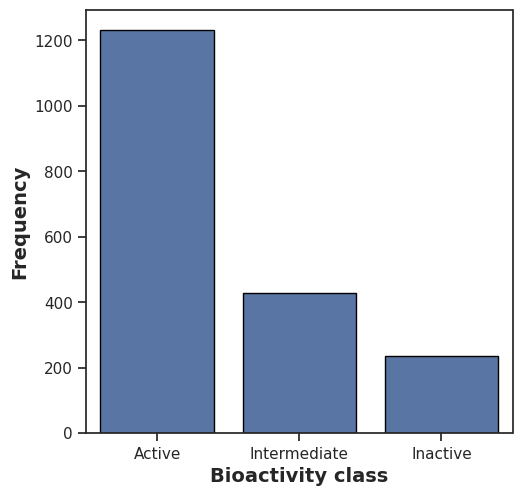

In [25]:
# Building the graph

plt.figure(figsize=(5.5, 5.5))
sns.countplot(x='bioactivity_class', data=df_final, edgecolor='black')
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')


## Saving the graph in PDF format.

plt.savefig('plot_bioactivity_class.pdf')

# Creating the scatter plot of molecular weight versus LogP

# Building the Box Plot graph of bioactivity versus pIC5 values: Kruskal-Wallis Test

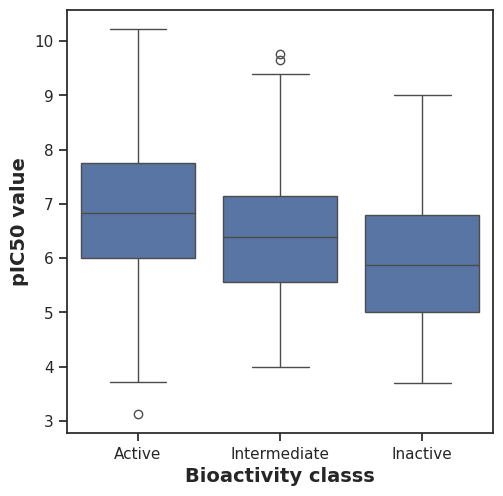

In [26]:
## Building the graph

plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_final)
plt.xlabel('Bioactivity classs', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')


## Saving the chart
plt.savefig('plot_ic50.pdf')

## Comparing molecular weight values : Kruskal-Wallis Test

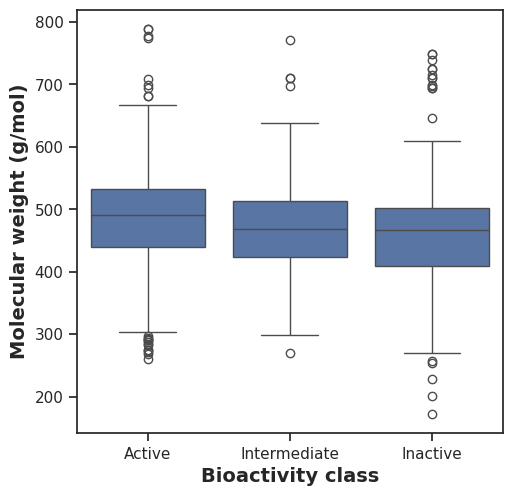

In [27]:
# Molecular weight
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Molecular weight (g/mol)', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [28]:
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL320553,Cc1oc(-c2ccccc2)nc1CCOc1ccc(C[C@](C)(Oc2ccccc2...,Active,457.526,5.73632,1.0,5.0,7.853872
1,CHEMBL149676,Cc1oc(-c2ccccc2)nc1CCOc1ccc(CC(C)(Oc2ccccc2)C(...,Intermediate,457.526,5.73632,1.0,5.0,7.744727
2,CHEMBL344282,Cc1oc(-c2ccccc2)nc1CCOc1ccc(CC(Oc2ccccc2)C(=O)...,Intermediate,443.499,5.34622,1.0,5.0,6.892790
3,CHEMBL278590,Cc1oc(C2CCCCC2)nc1CCOc1ccc(C[C@](C)(Oc2ccccc2)...,Active,463.574,6.11702,1.0,5.0,7.823909
4,CHEMBL424133,Cc1oc(-c2cccs2)nc1CCOc1ccc(C[C@](C)(Oc2ccccc2)...,Intermediate,463.555,5.79782,1.0,6.0,8.000000
...,...,...,...,...,...,...,...,...
1892,CHEMBL278501,COc1ccccc1CCC1(O)C(C)=C[C@@H](OC(C)=O)[C@@]2(C...,Inactive,710.861,5.30690,1.0,11.0,6.847712
1893,CHEMBL265334,CCOc1ccccc1CCC1(O)C(C)=C[C@@H](OC(C)=O)[C@@]2(...,Inactive,724.888,5.69700,1.0,11.0,7.468521
1894,CHEMBL16428,CCOc1ccccc1CCC1(O)C(C)=C[C@@H](OC(C)=O)[C@@]2(...,Inactive,724.888,5.69700,1.0,11.0,7.096910
1895,CHEMBL360583,COc1cccc(CCC2(O)C(C)=C[C@@H](OC(C)=O)[C@@]3(C)...,Intermediate,710.861,5.30690,1.0,11.0,7.619789


## Comparing LogP values: Kruskal-Wallis Test

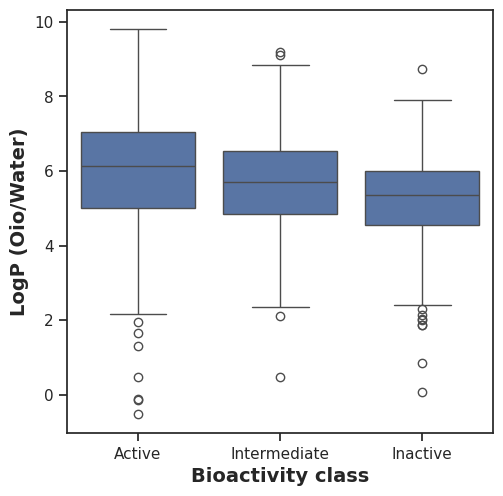

In [29]:
# LogP
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP (Oio/Water)', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

# Comparing the number of hydrogen bond donor groups: Kruskal-Wallis Test

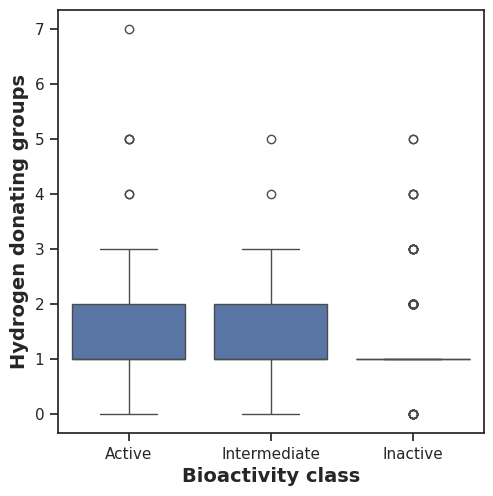

In [30]:
# Hydrogen bond donating groups
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Hydrogen donating groups', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

# Comparing the number of hydrogen bond acceptor groups: Kruskal-Wallis Test

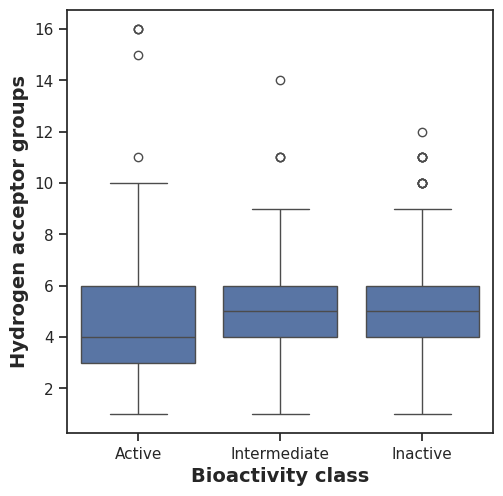

In [31]:
# Hydrogen bond acceptor groups
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Hydrogen acceptor groups', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from random import seed
from scipy.stats import kruskal
import pandas as pd

# Seed the random number generator
seed(1)

# Define the list of quantitative descriptors
quantitative_vars = ['MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'pIC50']

# Initialize an empty list to collect results
all_results = []

# Loop through each quantitative variable to perform the Kruskal-Wallis test and plot
for descriptor in quantitative_vars:
    # Separate the dataset into groups based on the bioactivity class
    ativo = df_final[df_final.bioactivity_class == 'Active'][descriptor]
    inativo = df_final[df_final.bioactivity_class == 'Inactive'][descriptor]
    intermediario = df_final[df_final.bioactivity_class == 'Intermediate'][descriptor]

    # Perform the Kruskal-Wallis test
    stat, p = kruskal(ativo, inativo, intermediario)

    # Interpret the result
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distributions (reject H0)'

    # Store the results
    results = {
        'Descriptor': descriptor,
        'Statistics': stat,
        'p': p,
        'alpha': alpha,
        'Interpretation': interpretation
    }
    all_results.append(results)

    # Plot the box plot for the current descriptor
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='bioactivity_class', y=descriptor, data=df_final, palette='Set2')
    plt.title(f'Box Plot of {descriptor} by Bioactivity Class')
    plt.xlabel('Bioactivity Class')
    plt.ylabel(descriptor)

    # Save the plot as a PNG file
    plot_filename = f'boxplot_{descriptor}.png'
    plt.savefig(plot_filename)
    plt.close()

    # Save each result to a separate CSV file
    filename = f'kruskal_{descriptor}.csv'
    pd.DataFrame([results]).to_csv(filename, index=False)

# Convert all results to a DataFrame and return
final_results_df = pd.DataFrame(all_results)
final_results_df.to_csv('kruskal_all_results.csv', index=False)

final_results_df

<ipython-input-32-aa17e4f31662>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bioactivity_class', y=descriptor, data=df_final, palette='Set2')
<ipython-input-32-aa17e4f31662>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bioactivity_class', y=descriptor, data=df_final, palette='Set2')
<ipython-input-32-aa17e4f31662>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bioactivity_class', y=descriptor, data=df_final, palette='Set2')
<ipython-input-32-aa17e4f31662>:45: FutureWarning: 

Passing `palette` without assigning `hue` is

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,40.127665,1.933696e-09,0.05,Different distributions (reject H0)
1,LogP,79.035183,6.882213e-18,0.05,Different distributions (reject H0)
2,NumHDonors,24.747568,4.227990e-06,0.05,Different distributions (reject H0)
3,NumHAcceptors,47.429156,5.022151e-11,0.05,Different distributions (reject H0)
4,pIC50,119.584537,1.077824e-26,0.05,Different distributions (reject H0)


# EXPLORATORY ANALYSIS: CONCLUSIONS

In [33]:
# Considering the pIC50 analysis, the values ​​of active and bioactive compounds were statistically different. These results were already expected;
# The threshld was 6, that is, bioactive compounds: pIC50>6; inactive compounds: pIC50<6;
# Two other lipinsk descriptors (Wolecular weight, logP, hydrogen repting and donating groups) also showed similar results;
# Overall, we can conclude that the three classes of compounds meet the drug-likeness characteristics proposed by Pfizer Pharmaceuticals;
# Deep analysis using supervised machine learning models (regression) is warranted.

# Lastly, saving (zipping) all files generated in this Jupyter notebook

In [34]:
! zip -r resultados.zip . -i *.csv *.pdf

  adding: kruskal_MW.csv (deflated 10%)
  adding: kruskal_pIC50.csv (deflated 11%)
  adding: plot_ic50.pdf (deflated 35%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: kruskal_NumHAcceptors.csv (deflated 11%)
  adding: kruskal_NumHDonors.csv (deflated 10%)
  adding: plot_MW.pdf (deflated 36%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: PART0 3 LEPRA_3classes.csv (deflated 81%)
  adding: kruskal_all_results.csv (deflated 49%)
  adding: Lepra Clofazimina_PART02 F.csv (deflated 85%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: kruskal_LogP.csv (deflated 9%)
  adding: plot_bioactivity_class.pdf (deflated 37%)
